<a href="https://colab.research.google.com/github/ClarisseAlvarenga/cafezinho_crosstab/blob/main/Crosstabs_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USANDO O PANDAS CROSSTAB PARA ANÁLISE DE DADOS**

#### Importando bibliotecas

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Visualização Inicial do Dataset**

Vamos usar um dataset performance de estudantes em exames, do Kaggle:

https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv

In [80]:
fonte = 'https://raw.githubusercontent.com/ClarisseAlvarenga/cafezinho_crosstab/main/StudentsPerformance.csv'

In [81]:
#criando o dataset
dados = pd.read_csv(fonte)
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [82]:
#shape
dados.shape

(1000, 8)

In [83]:
dados.columns = dados.columns.str.replace(' ', '_')

In [84]:
dados.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Cruzando dados com groupby

In [85]:
#usando o groupby
matematica_por_genero = pd.DataFrame(dados.groupby('gender')['math_score'].agg(['mean', 'median',  lambda x: x.mode(), 'std'])).reset_index()
matematica_por_genero.columns = ['genero', 'media','mediana', 'moda', 'desvio_padrao']
matematica_por_genero

,genero,media,mediana,moda,desvio_padrao
0,female,63.633205,65,65,15.491453
1,male,68.728216,69,62,14.356277


## **CrossTab**

documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

#### Fazendo nossa primeira tabela cruzada

In [86]:
#cruzando dados de gênero por tipo de almoço
cross = pd.crosstab(index=dados['gender'], columns=dados['lunch'])
cross

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


In [87]:
#conferindo o tipo de variável que o crosstab gera
type(cross)

pandas.core.frame.DataFrame

### Contando valores por categoria

In [90]:
cross = pd.crosstab(columns=dados['test_preparation_course'], index=dados['parental_level_of_education'])
cross

test_preparation_course,completed,none
parental_level_of_education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


#### Transformando a contagem em porcentagem

In [91]:
pd.crosstab(columns=dados['test_preparation_course'], index=dados['parental_level_of_education'], normalize=True)

test_preparation_course,completed,none
parental_level_of_education,,
associate's degree,0.082,0.140
bachelor's degree,0.046,0.072
high school,0.056,0.140
master's degree,0.020,0.039
some college,0.077,0.149
some high school,0.077,0.102


In [151]:
#percentual por index
pd.crosstab(columns=dados['race/ethnicity'], index=dados['parental_level_of_education'],normalize='index')

race/ethnicity,group A,group B,group C,group D,group E
parental_level_of_education,,,,,
associate's degree,0.063063,0.184685,0.351351,0.225225,0.175676
bachelor's degree,0.101695,0.169492,0.338983,0.237288,0.152542
high school,0.091837,0.244898,0.326531,0.224490,0.112245
master's degree,0.050847,0.101695,0.322034,0.389831,0.135593
some college,0.079646,0.163717,0.305310,0.296460,0.154867
some high school,0.134078,0.212291,0.273743,0.279330,0.100559


#### Usando mais de dois dados para cruzar

In [93]:
lista = [dados['gender'], dados['parental_level_of_education']]
pd.crosstab(columns=dados['test_preparation_course'], index=lista)

test_preparation_course             completed  none
gender parental_level_of_education                 
female associate's degree                  42    74
       bachelor's degree                   22    41
       high school                         29    65
       master's degree                     14    22
       some college                        42    76
       some high school                    35    56
male   associate's degree                  40    66
       bachelor's degree                   24    31
       high school                         27    75
       master's degree                      6    17
       some college                        35    73
       some high school                    42    46

### Agregando Funções

In [95]:
#colunas
dados.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [122]:
math_gender_lunch = pd.crosstab(index = dados.gender, columns = [dados.lunch, dados['race/ethnicity']],
                                aggfunc='median',values=dados.math_score, margins=True, margins_name='Mediana')
math_gender_lunch

lunch          free/reduced                  ... standard         Mediana
race/ethnicity      group A group B group C  ...  group D group E        
gender                                       ...                         
female                 48.0    58.0    53.5  ...     69.0    74.5      65
male                   59.5    58.5    61.0  ...     73.0    81.0      69
Mediana                53.0    58.0    59.0  ...     71.0    77.0      66

[3 rows x 11 columns]

In [111]:
math_gender_lunch.T


gender                                 female       male
       lunch        race/ethnicity                      
mean   free/reduced group A         49.928571  58.590909
                    group B         56.512821  58.633333
                    group C         52.838710  60.673077
                    group D         58.039216  64.681818
                    group E         61.304348  73.277778
       standard     group A         64.000000  67.387097
                    group B         64.338462  69.839286
                    group C         66.864407  71.758621
                    group D         69.961538  71.752809
                    group E         75.565217  77.924528
median free/reduced group A         48.000000  59.500000
                    group B         58.000000  58.500000
                    group C         53.500000  61.000000
                    group D         58.000000  63.500000
                    group E         61.000000  77.500000
       standard     group A         60.000000  66.000000
                    group B         65.000000  68.500000
                    group C         66.000000  71.000000
                    group D         69.000000  73.000000
                    group E         74.500000  81.000000
std    free/reduced group A         12.079635  14.568914
                    group B         17.027643  14.329818
                    group C         14.931750  12.377591
                    group D         14.974593  11.815978
                    group E         15.569302  16.997597
       standard     group A         12.769010  13.554034
                    group B         15.160884  12.524560
                    group C         12.648378  13.461371
                    group D         11.464731  13.123782
                    group E         14.565793  13.235804

### Incluindo Subtotais

In [114]:
math_gender_ethnicity = pd.crosstab(columns = dados.gender, index = dados['race/ethnicity'], aggfunc='mean',values=dados.math_score,margins=True)
math_gender_ethnicity

gender,female,male,All
race/ethnicity,,,
group A,58.527778,63.735849,61.629213
group B,61.403846,65.930233,63.452632
group C,62.033333,67.611511,64.463950
group D,65.248062,69.413534,67.362595
group E,70.811594,76.746479,73.821429
All,63.633205,68.728216,66.089000


In [144]:
pd.crosstab(columns = dados.gender, index = [dados['race/ethnicity'], dados['lunch']], 
            aggfunc='mean',values=dados.math_score,margins=True)

gender                          female       male        All
race/ethnicity lunch                                        
group A        free/reduced  49.928571  58.590909  55.222222
               standard      64.000000  67.387097  65.981132
group B        free/reduced  56.512821  58.633333  57.434783
               standard      64.338462  69.839286  66.884298
group C        free/reduced  52.838710  60.673077  56.412281
               standard      66.864407  71.758621  68.941463
group D        free/reduced  58.039216  64.681818  61.115789
               standard      69.961538  71.752809  70.916168
group E        free/reduced  61.304348  73.277778  66.560976
               standard      75.565217  77.924528  76.828283
All                          63.633205  68.728216  66.089000

### Criando colunas extras

In [125]:
dados.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [128]:
cross = pd.crosstab(columns=dados['race/ethnicity'], index=dados['parental_level_of_education'])

In [129]:
cross

race/ethnicity,group A,group B,group C,group D,group E
parental_level_of_education,,,,,
associate's degree,14,41,78,50,39
bachelor's degree,12,20,40,28,18
high school,18,48,64,44,22
master's degree,3,6,19,23,8
some college,18,37,69,67,35
some high school,24,38,49,50,18


In [136]:
#criando uma coluna
cross['percent_group A'] = cross['group A']/cross.sum(axis=1)

In [138]:
type(cross)

pandas.core.frame.DataFrame

In [137]:
cross

race/ethnicity,group A,group B,group C,group D,group E,percent_group A
parental_level_of_education,,,,,,
associate's degree,14,41,78,50,39,0.031532
bachelor's degree,12,20,40,28,18,0.050847
high school,18,48,64,44,22,0.045918
master's degree,3,6,19,23,8,0.025424
some college,18,37,69,67,35,0.039823
some high school,24,38,49,50,18,0.067039


### Criando Visualizações

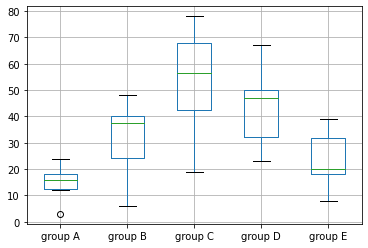

In [150]:
pd.crosstab(columns=dados['race/ethnicity'], index=dados['parental_level_of_education']).boxplot();
